In [6]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('Salries.csv')

In [8]:
df = data.copy(deep=True)

In [9]:
df.sample(5)

,rank,discipline,phd,service,sex,salary
63,Prof,A,29,27,Female,91000
29,Prof,B,21,20,Male,123683
66,AsstProf,A,7,6,Female,63100
71,AssocProf,B,12,9,Female,71065
34,AssocProf,B,12,8,Male,119800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [11]:
df.describe().columns

Index(['phd', 'service', 'salary'], dtype='object')

In [12]:
df.isna().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [13]:
df.isnull().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [14]:
df = df.drop_duplicates()

In [15]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

<Axes: ylabel='salary'>

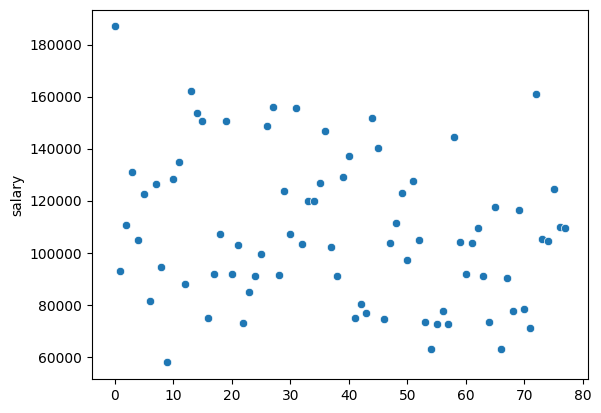

In [16]:
sns.scatterplot(data=df['salary'])

<Axes: xlabel='rank', ylabel='count'>

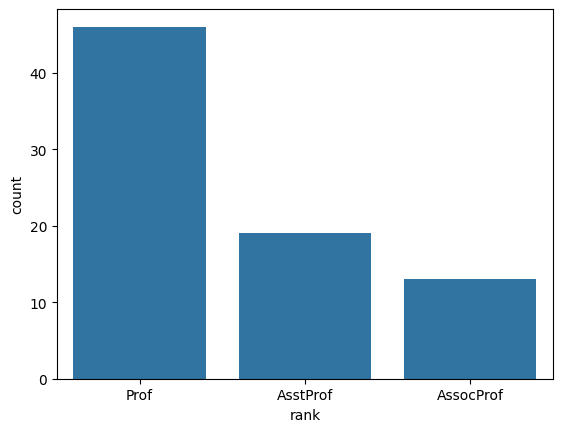

In [18]:
sns.barplot(data=df['rank'].value_counts())

<Axes: xlabel='rank', ylabel='salary'>

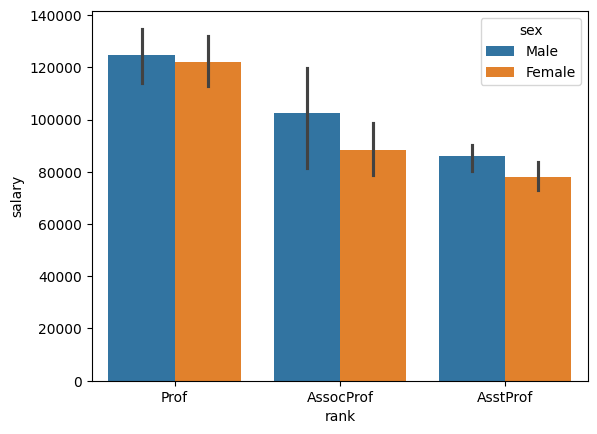

In [19]:
sns.barplot(data=df,x=df['rank'],y=df['salary'],hue=df['sex'])

<Axes: xlabel='discipline', ylabel='salary'>

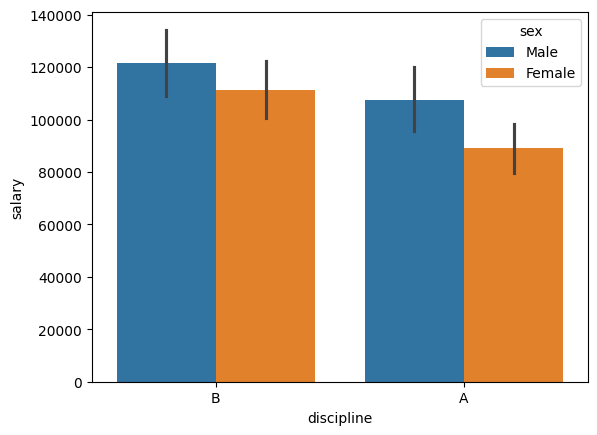

In [20]:
sns.barplot(data=df,x=df['discipline'],y=df['salary'],hue=df['sex'])

In [21]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

<Axes: ylabel='sex'>

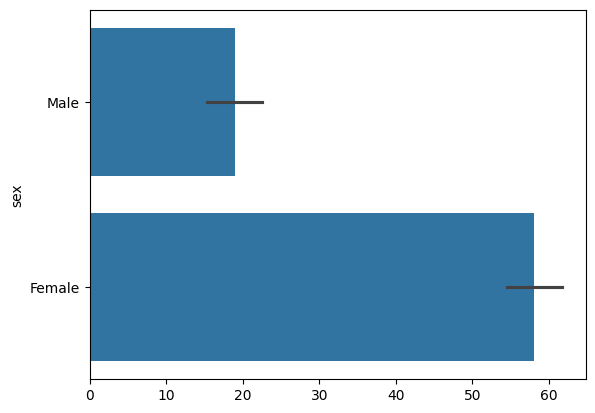

In [22]:
sns.barplot(df['sex'])

<Axes: xlabel='sex', ylabel='salary'>

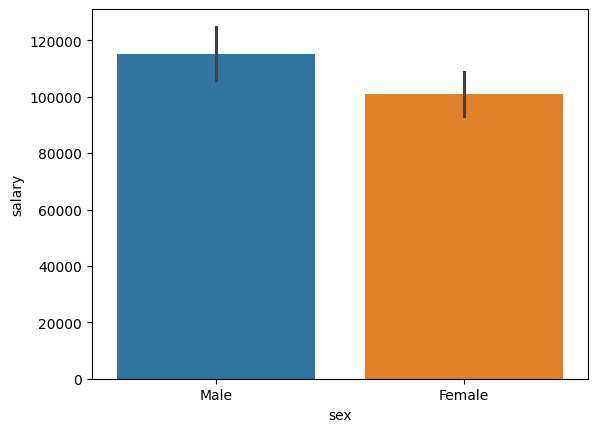

In [23]:
sns.barplot(data=df,x=df['sex'],y=df['salary'],hue=df['sex'])

<Axes: xlabel='sex', ylabel='salary'>

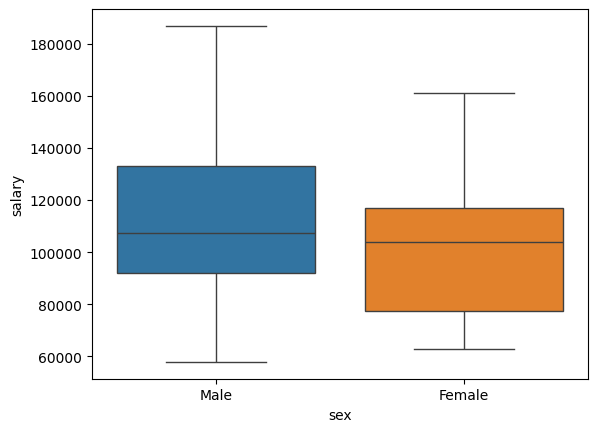

In [24]:
sns.boxplot(data=df,x='sex',y='salary',hue='sex')

<Axes: >

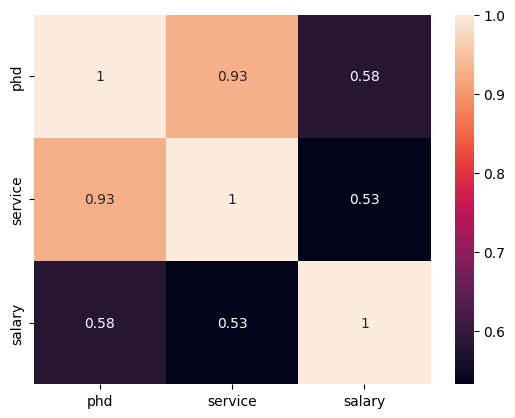

In [25]:
sns.heatmap(data=df[['phd', 'service', 'salary']].corr(),annot=True)

In [26]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

null_hypothesis = no realtion

alternative = there is relation

In [27]:
from scipy import stats

# Perform ANOVA test
grouped_data = [df['salary'][df['sex'] == category] for category in df['sex'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print('There is a Significant relationship')
else:
    print('There is No Significant relationship')

F-statistic: 5.056591414540251
P-value: 0.027429778657910308
There is a Significant relationship


realtionship with salary column

rank 
F-statistic: 31.47638426157929
P-value: 1.1882466669224673e-10
There is a Significant relationship

discipline
F-statistic: 8.622906377322696
P-value: 0.004390607516848336
There is a Significant relationship

services
F-statistic: 3.3666053100690134
P-value: 9.90518287880628e-05
There is a Significant relationship

sex
F-statistic: 5.056591414540251
P-value: 0.027429778657910308
There is a Significant relationship

In [28]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

columns discipline and rank need label encoder

columns sex need dummies

In [29]:
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954



- Rank: This column likely represents the rank or position of the individual within an organization or academic institution. In this case, it seems to indicate that all the individuals in the dataset hold the position of "Prof" which could stand for "Professor."  

- Discipline: This column likely represents the academic discipline or field in which the individual works. In the provided data, the values "A" and "B" seem to represent different academic disciplines.

- PhD: This column likely represents the number of years since the individual was awarded their Ph.D. degree. It could also represent the number of years the individual has spent in a Ph.D. program.

- Service: This column likely represents the number of years of service or experience the individual has in their current position or within the academic institution. 

- Sex: This column likely represents the gender of the individual, with "Male" and "Female" being the possible values.

- Salary: This column represents the salary of the individuals in the dataset.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [31]:
X = df.drop(columns='salary')
y = df['salary']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


need to encode train,test and validation separately.

#### X_train lable encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['rank', 'discipline','sex']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    X_train[column] = label_encoder.fit_transform(X_train[column])

#### X_test lable encoding

In [34]:
columns_to_encode = ['rank', 'discipline','sex']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    X_test[column] = label_encoder.fit_transform(X_test[column])

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [69]:
dtree = DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

prediction = dtree.predict(X_test)
print("MAE",mean_absolute_error(y_test,prediction))
print("MSE",mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(mean_squared_error(y_test,prediction)))
print("R2 Score",r2_score(y_test,prediction))

MAE 20159.115608108106
MSE 663980721.0691452
RMSE 25767.823366926925
R2 Score 0.3813537037961253


In [71]:
r2 = r2_score(y_test,prediction)
Ar2 = 1 - ((1-r2) * (X_test.shape[0] - 1)/(X_test.shape[0] -1 -1))
print("Adjusted R2",Ar2)

Adjusted R2 0.3371646826387057


In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
k = 5  # You can choose a different number of folds
scores = cross_val_score(dtree, X_train, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [nan nan nan nan nan]
Mean Accuracy: nan
Standard Deviation: nan


c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Decision-Tree\env\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Decision-Tree\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Decision-Tree\env\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Decision-Tree\

In [57]:
from dtreeviz.trees import *


In [58]:
viz = dtreeviz(dtree,
               X_train,
               y_train,
               target_name='salary',
               feature_names=['rank', 'discipline', 'phd', 'service', 'sex'])

viz

NameError: name 'dtreeviz' is not defined

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

prediction = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,prediction))
print("MSE",mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(mean_squared_error(y_test,prediction)))
print("R2 Score",r2_score(y_test,prediction))

MAE 15417.625
MSE 373621479.375
RMSE 19329.290710602912
R2 Score 0.6518881692447727


In [ ]:
r2 = r2_score(y_test,prediction)
Ar2 = 1 - ((1-r2) * (X_test.shape[0] - 1)/(X_test.shape[0] -1 -1))
print("Adjusted R2",Ar2)

Adjusted R2 0.6270230384765422


In [ ]:
# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

prediction = lr1.predict(X_test)
print("MAE",mean_absolute_error(y_test,prediction))
print("MSE",mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(mean_squared_error(y_test,prediction)))
print("R2 Score",r2_score(y_test,prediction))

MAE 15290.959491478161
MSE 350056509.4580622
RMSE 18709.797151708037
R2 Score 0.6738442003412706


In [ ]:
r2 = r2_score(y_test,prediction)
Ar2 = 1 - ((1-r2) * (X_test.shape[0] - 1)/(X_test.shape[0] -1 -1))
print("Adjusted R2",Ar2)

Adjusted R2 0.6505473575085041


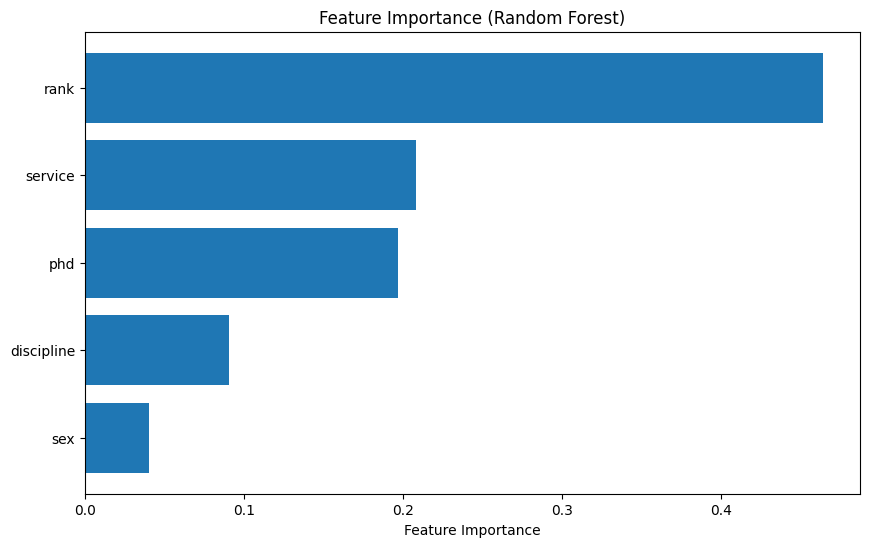

In [ ]:
feature_importances = dtree.feature_importances_

# Define feature names manually or access them from wherever you defined them
feature_names = ['rank', 'discipline', 'phd', 'service', 'sex']  # Replace with your actual feature names

# Sort feature names by importances
sorted_feature_names = [x for _, x in sorted(zip(feature_importances, feature_names), reverse=True)]

# Sort the importances accordingly
sorted_importances = np.sort(feature_importances)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()